# Test case for Data Engineer
## Task 1.
- Use yfinance
- get index for tickers for long period
- Load data to database

In [1]:
import yfinance as yf
import pandas as pd
from sqlalchemy import create_engine
import json
import psycopg2
import numpy as np

### Load data

In [2]:
# Define tickers and period
IamIntrestingIn = ['AAPL','SPY']
period_start ="2021-09-01"
period_end="2022-05-05"


In [3]:
data = yf.download(' '.join(IamIntrestingIn),
                   start=period_start,
                   end=period_end)
data = data.stack(level=1) \
    .reset_index(level=1, drop=False) \
    .rename(columns={'level_1': 'ticker'})


[*********************100%***********************]  2 of 2 completed


### Connect to db
[Example of credentials.json](https://github.com/binSmile/python-training/blob/main/ect/SQL_by_wib/credentials_example.json).
Remove "ca_cert_path" and "sslmode" if you don't need it.


In [4]:
# SQL connection
with open('credentials\\credentials.json', 'r') as file:
    connection_params = json.load(file)
connection = psycopg2.connect(**connection_params)

q = connection.cursor()
q.execute('SELECT version()')
print(q.fetchone())

('PostgreSQL 15.2 (Ubuntu 15.2-201-yandex.54409.3746b2454e) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0, 64-bit',)


In [5]:
# Create Object Engine in SQLAlchemy
engine = create_engine('postgresql+psycopg2://', creator=lambda: connection)

In [6]:
# Loading data to PostgreSQL
data \
    .to_sql('tickers', con=engine, if_exists='replace', index=True)

340

## Task 2.
Extract data from database

In [7]:
q.execute('''
SELECT * FROM tickers
''')

column_names = [desc[0] for desc in q.description]
df = pd.DataFrame(q.fetchall(), columns=column_names)

connection.close()

data = df.set_index('Date')


## Task 3
We construct relative (note: not absolute!) daily price changes for two instruments (AAPL, SPY) using Python's graphical libraries such as matplotlib, for example. It would be great if you could provide comments on it and build another mathematical model as well.
Like: [this](https://finance.yahoo.com/chart/SPY#eyJpbnRlcnZhbCI6ImRheSIsInBlcmlvZGljaXR5IjoxLCJjYW5kbGVXaWR0aCI6MTMuMjk0MTE3NjQ3MDU4ODI0LCJmbGlwcGVkIjpmYWxzZSwidm9sdW1lVW5kZXJsYXkiOnRydWUsImFkaiI6dHJ1ZSwiY3Jvc3NoYWlyIjp0cnVlLCJjaGFydFR5cGUiOiJsaW5lIiwiZXh0ZW5kZWQiOmZhbHNlLCJtYXJrZXRTZXNzaW9ucyI6e30sImFnZ3JlZ2F0aW9uVHlwZSI6Im9obGMiLCJjaGFydFNjYWxlIjoicGVyY2VudCIsInBhbmVscyI6eyJjaGFydCI6eyJwZXJjZW50IjoxLCJkaXNwbGF5IjoiU1BZIiwiY2hhcnROYW1lIjoiY2hhcnQiLCJpbmRleCI6MCwieUF4aXMiOnsibmFtZSI6ImNoYXJ0IiwicG9zaXRpb24iOm51bGx9LCJ5YXhpc0xIUyI6W10sInlheGlzUkhTIjpbImNoYXJ0Iiwi4oCMdm9sIHVuZHLigIwiXX19LCJsaW5lV2lkdGgiOjIsInN0cmlwZWRCYWNrZ3JvdW5kIjp0cnVlLCJldmVudHMiOnRydWUsImNvbG9yIjoiIzAwODFmMiIsInN0cmlwZWRCYWNrZ3JvdWQiOnRydWUsImV2ZW50TWFwIjp7ImNvcnBvcmF0ZSI6eyJkaXZzIjp0cnVlLCJzcGxpdHMiOnRydWV9LCJzaWdEZXYiOnt9fSwic3ltYm9scyI6W3sic3ltYm9sIjoiU1BZIiwic3ltYm9sT2JqZWN0Ijp7InN5bWJvbCI6IlNQWSIsInF1b3RlVHlwZSI6IkVURiIsImV4Y2hhbmdlVGltZVpvbmUiOiJBbWVyaWNhL05ld19Zb3JrIn0sInBlcmlvZGljaXR5IjoxLCJpbnRlcnZhbCI6ImRheSJ9LHsic3ltYm9sIjoiQUFQTCIsInN5bWJvbE9iamVjdCI6eyJzeW1ib2wiOiJBQVBMIn0sInBlcmlvZGljaXR5IjoxLCJpbnRlcnZhbCI6ImRheSIsImlkIjoiQUFQTCIsInBhcmFtZXRlcnMiOnsiY29sb3IiOiIjZmZhMzNmIiwid2lkdGgiOjIsImlzQ29tcGFyaXNvbiI6dHJ1ZSwic2hhcmVZQXhpcyI6dHJ1ZSwiY2hhcnROYW1lIjoiY2hhcnQiLCJzeW1ib2xPYmplY3QiOnsic3ltYm9sIjoiQUFQTCJ9LCJwYW5lbCI6ImNoYXJ0IiwiZmlsbEdhcHMiOmZhbHNlLCJhY3Rpb24iOiJhZGQtc2VyaWVzIiwic3ltYm9sIjoiQUFQTCIsImdhcERpc3BsYXlTdHlsZSI6InRyYW5zcGFyZW50IiwibmFtZSI6IkFBUEwiLCJvdmVyQ2hhcnQiOnRydWUsInVzZUNoYXJ0TGVnZW5kIjp0cnVlLCJoZWlnaHRQZXJjZW50YWdlIjowLjcsIm9wYWNpdHkiOjEsImhpZ2hsaWdodGFibGUiOnRydWUsInR5cGUiOiJsaW5lIiwic3R5bGUiOiJzdHhfbGluZV9jaGFydCIsImhpZ2hsaWdodCI6ZmFsc2V9fV0sInN0dWRpZXMiOnsi4oCMdm9sIHVuZHLigIwiOnsidHlwZSI6InZvbCB1bmRyIiwiaW5wdXRzIjp7ImlkIjoi4oCMdm9sIHVuZHLigIwiLCJkaXNwbGF5Ijoi4oCMdm9sIHVuZHLigIwifSwib3V0cHV0cyI6eyJVcCBWb2x1bWUiOiIjMDBiMDYxIiwiRG93biBWb2x1bWUiOiIjZmYzMzNhIn0sInBhbmVsIjoiY2hhcnQiLCJwYXJhbWV0ZXJzIjp7IndpZHRoRmFjdG9yIjowLjQ1LCJjaGFydE5hbWUiOiJjaGFydCIsInBhbmVsTmFtZSI6ImNoYXJ0In19fSwiY3VzdG9tUmFuZ2UiOnsic3RhcnQiOjE2MzA0NDAwMDAwMDAsImVuZCI6MTY1MTYwODAwMDAwMH0sInJhbmdlIjp7ImR0TGVmdCI6IjIwMjEtMDgtMzFUMjA6MDA6MDAuMDAwWiIsImR0UmlnaHQiOiIyMDIyLTA1LTA0VDE5OjU5OjAwLjAwMFoiLCJwZXJpb2RpY2l0eSI6eyJpbnRlcnZhbCI6ImRheSIsInBlcmlvZCI6MX0sInBhZGRpbmciOjB9fQ--)

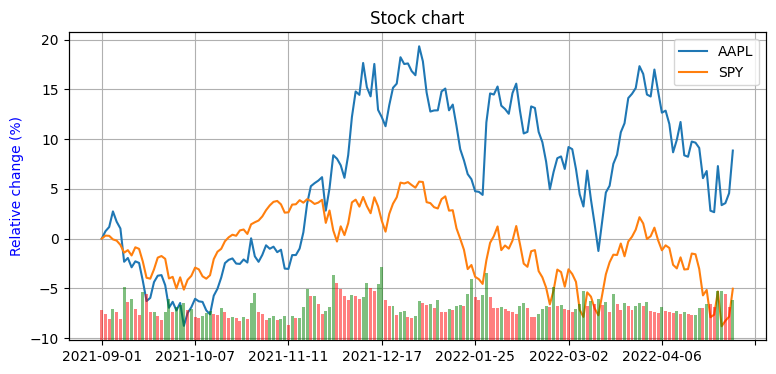

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.lines as ml
from matplotlib.dates import DateFormatter, DayLocator
from matplotlib.ticker import Formatter

def format_date(x, _):
    try:
        # convert datetime64 to datetime, and use datetime's strftime:
        return df.index[round(x)].strftime('%Y-%m-%d')
    except IndexError:
        pass


fig, ax = plt.subplots(figsize=(9, 4))

for t in IamIntrestingIn:
    df = data.loc[data['ticker'] == t][['Close','Volume']].copy()                   # select data

    if t == IamIntrestingIn[0]:                                                     # Plot Volume bars only for first ticker
        ax2 = ax.twinx()
        ax2.grid(False)
        colors = df['Volume'].diff().apply(lambda x: 'green' if x >= 0 else 'red')  # Calculate colors
        ax2.bar(np.arange(0,df.shape[0]), df['Volume'], color=colors, alpha=0.5)    # plot bars with Volume
        ax2.set_ylim(0,ax2.get_ylim()[1]*4)                                         # place bars on bottom quarter
        ax2.set_yticks([])

    df[t] = (df.Close * 100 / df.Close.iloc[0]) - 100       # Calc relative diff
    ax.plot(df[t].values, label=f'{t}')                     # plot line



ax.set_ylabel('Relative change (%)', color='blue')
ax.legend()
ax.grid(True)
plt.title('Stock chart')
ax.xaxis.set_major_formatter(format_date)  # internally creates FuncFormatter, it's needs for equidistant position of points. Financial data hasn't data at non working days.
# ax.tick_params(axis='x', rotation=30)    # You can rotate ticks, if you want
plt.show()

## Task 3.1
Modeling.
I'm not a pro in this field. But I will try to present an answer to this question anyway.

There are several different approaches to modeling stock price movements. One of the most popular is the use of time series and statistical models such as autoregressive (AR) models, moving averages (MA), ARIMA, and GARCH. However, it should be noted that predicting stock prices is a complex task, and a model that works well on some data may perform poorly on others.

Below is an example of using an ARIMA model.




##############################################################################
#                  Let's make forecast for fAAPL                              #
##############################################################################
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  176
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -415.871
Date:                Sun, 09 Jul 2023   AIC                            843.741
Time:                        15:23:23   BIC                            862.730
Sample:                    09-01-2021   HQIC                           851.444
                         - 05-04-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

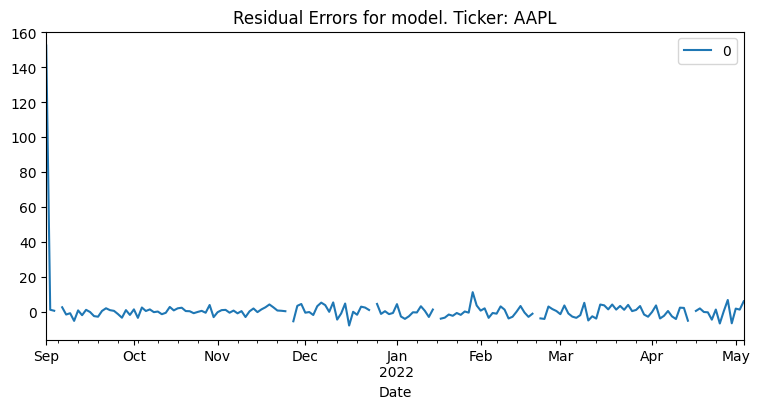



##############################################################################
#                  Let's make forecast for fSPY                              #
##############################################################################
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  176
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -517.757
Date:                Sun, 09 Jul 2023   AIC                           1047.513
Time:                        15:23:24   BIC                           1066.502
Sample:                    09-01-2021   HQIC                          1055.216
                         - 05-04-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

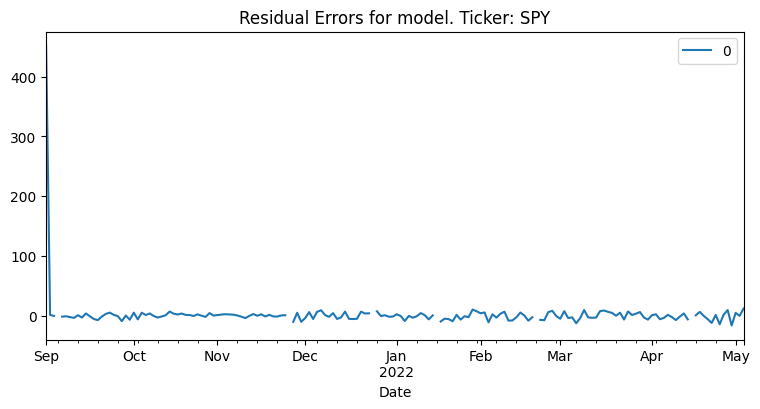

In [9]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

for t in IamIntrestingIn:
    print(f'''

##############################################################################
#                  Let's make forecast for f{t}                              #
##############################################################################''')
    df = data.loc[data['ticker'] == t][['Close','Volume']].copy()                   # select data
    df = df.asfreq('B')
    model = ARIMA(df.Close, order=(5,1,0))
    model_fit = model.fit()
    print(model_fit.summary())

    # Forecast
    forecast = model_fit.forecast(steps=10)  # Forecast duration
    print('Forecast: ')
    print(forecast)

    # plot residual errors
    residuals = pd.DataFrame(model_fit.resid)
    fig, ax = plt.subplots(figsize=(9, 4))
    residuals.plot(ax=ax)
    plt.title(f'Residual Errors for model. Ticker: {t}')
    plt.show()

